In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<IPython.core.display.Latex object>

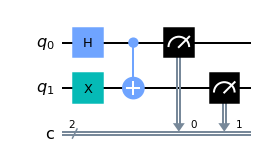

In [67]:
#Program to Generate the state 1/√2(|01⟩+|10⟩)

from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.x(q[1])
qc.cx(q[0], q[1])
psi = qi.Statevector.from_instruction(qc)
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

#Printing the state vector

display(psi.draw('latex', prefix='|\\psi_{qc}\\rangle = '),qc.draw())

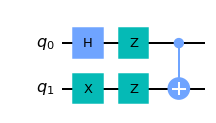

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
#Program to find density matrix of the state 1/√2(|01⟩-|10⟩) and display the matrix

from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.quantum_info as qi

q = QuantumRegister(2, 'q')
qc = QuantumCircuit(q)

qc.h(q[0])
qc.x(q[1])
qc.z(q[1])
qc.z(q[0])
qc.cx(q[0], q[1])

psi = qi.Statevector.from_instruction(qc)
rho = qi.DensityMatrix.from_instruction(qc)

display(qc.draw(),
psi.draw('latex', prefix='\\psi_{qc} = '),
rho.draw('latex', prefix='\\rho_{qc} = '))


In [7]:
#Write a program to find partial trace and entanglement entropy of above state

from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import qiskit.quantum_info as qi

q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.x(q[1])
qc.z(q[1])
qc.z(q[0])
qc.cx(q[0], q[1])

qc.draw()

rho = qi.DensityMatrix.from_instruction(qc)

rho2 = qi.partial_trace(rho,[0])
rho1 = qi.partial_trace(rho,[1])
ent = qi.entropy(rho, base=2)

display(rho2.draw('latex', prefix=" \\rho_{2} = "),
        rho1.draw('latex', prefix=" \\rho_{1} = "))

print("Entropy of the state is = ",ent)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Entropy of the state is =  1.4415419267167124e-15


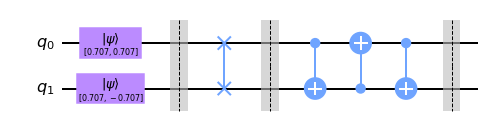

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [32]:
#Find the Decomposition of SWAP GATE INTO CNOT GATES

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble
from numpy import pi
import qiskit.quantum_info as qi
import numpy as np

qr = QuantumRegister(2, 'q')
qc = QuantumCircuit(qr)
sim = Aer.get_backend('aer_simulator')

qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 1)

psi_initial = qi.Statevector.from_instruction(qc)

#Applying swap gate on initial state 
qc.barrier()

qc.swap(qr[0], qr[1])

qc.barrier()

psi_swap = qi.Statevector.from_instruction(qc)

#applying 3 cnot gates to get back the initial state and prove the decomposition of swap into 3 cnots
qc.cx(qr[0],qr[1])
qc.cx(qr[1],qr[0])
qc.cx(qr[0],qr[1])

qc.barrier()

psi_cnot = qi.Statevector.from_instruction(qc)

display(qc.draw(),psi_initial.draw('latex', prefix='|\\psi_{initial}\\rangle = '),
        psi_swap.draw('latex', prefix='|\\psi_{swap}\\rangle = '),
        psi_cnot.draw('latex', prefix='|\\psi_{cnot}\\rangle = '))



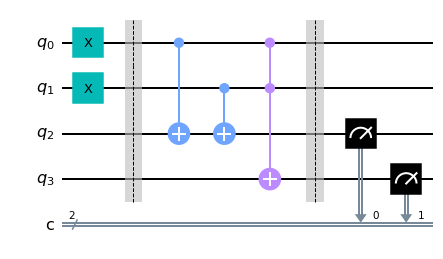

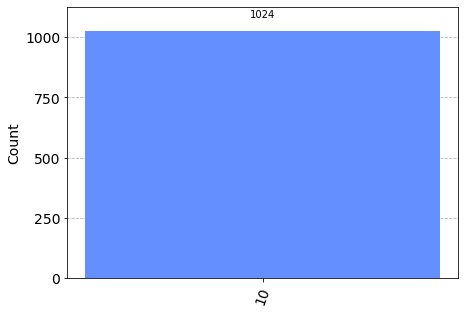

In [40]:
from qiskit import *
import matplotlib.pyplot as plt 
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(4,2)
qc.x(0) 
qc.x(1)

qc.barrier()

qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)

qc.barrier()

qc.measure(2,0) 
qc.measure(3,1) 
qc.draw(output='mpl')

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
display(qc.draw(),
        plot_histogram(counts))

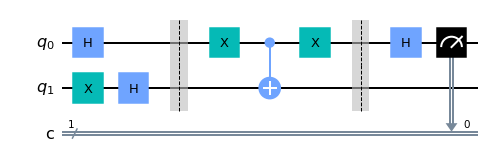

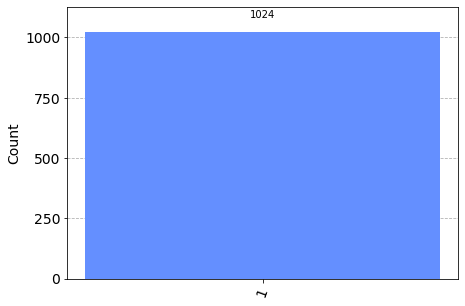

In [43]:
#Demonstarte Deutsch Algorithm for oracle function f(0)=1 and f(1)=0 

from qiskit import *
from numpy import pi
from qiskit.visualization import plot_histogram

q = QuantumRegister(2, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.x(q[1])
circuit.h(q[1])

#Seperating our oracle( function f(0)=1 and f(1)=0 )

circuit.barrier()

#b0 != b1 
circuit.x(q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])

circuit.barrier()

circuit.h(q[0])

#Measuring the 1st qubit in Z - basis 
circuit.measure(q[0], c[0])

counts = execute(circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
display(circuit.draw(),
        plot_histogram(counts))

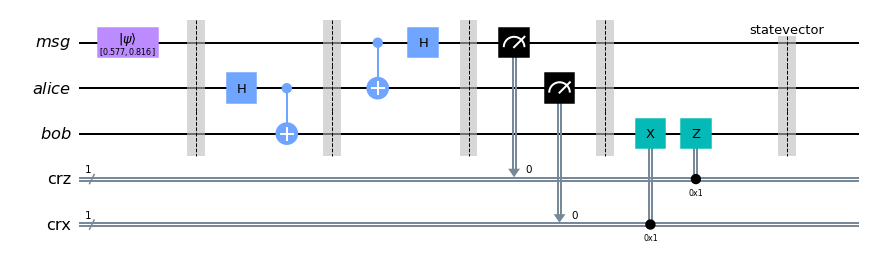

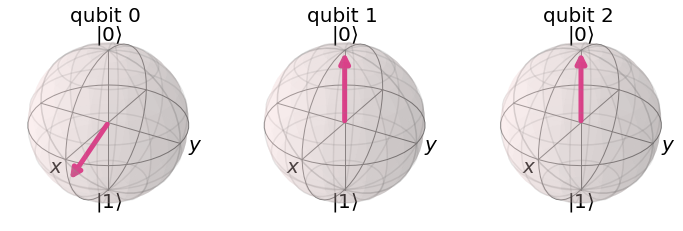

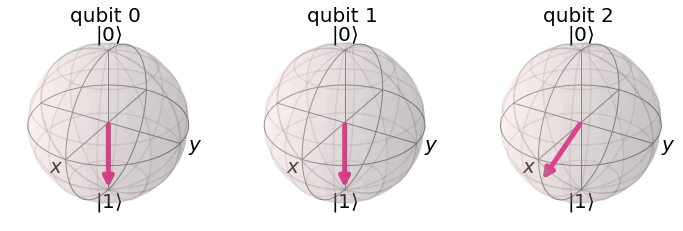

In [57]:
#Demonstrate Quantum Teleportation
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.extensions import Initialize
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

#Creating the circuit
msg_qubit = QuantumRegister(1,'msg')
alice_ent = QuantumRegister(1,'alice')
bob_ent = QuantumRegister(1, 'bob')
crz = ClassicalRegister(1,'crz')
crx = ClassicalRegister(1,'crx')
circuit = QuantumCircuit(msg_qubit,alice_ent,bob_ent,crz,crx)

#Applying the provided state to the qubits
init_gate = Initialize([np.sqrt(1/3),np.sqrt(2/3)])
circuit.append(init_gate,msg_qubit)

bstate = Statevector(circuit)
circuit.barrier()

#Entangling Alice and Bob states
circuit.h(alice_ent)
circuit.cx(alice_ent,bob_ent)

circuit.barrier()

#Sending message from Alice to Bob using their entangled states
circuit.cx(msg_qubit,alice_ent)
circuit.h(msg_qubit)

circuit.barrier()

#Measuring and sending the classical values of both Qubits of Alice
circuit.measure(msg_qubit,crz)
circuit.measure(alice_ent,crx)

circuit.barrier()

#Applying appropriate gates to decode entangled bit to get the message
circuit.x(bob_ent).c_if(crx,1)
circuit.z(bob_ent).c_if(crz,1)

circuit.draw(output = "mpl")

#Displaying bloch vectors for all qubits
sim = Aer.get_backend('aer_simulator')
circuit.save_statevector()
out_vector = sim.run(circuit).result().get_statevector()
display(circuit.draw(),plot_bloch_multivector(bstate),plot_bloch_multivector(out_vector))

#Conclusion
# qubit 0 is the original message and qubit 2 is the transmistted message hence Quantum Teleportation was successful

Success!
Hidden String: 01


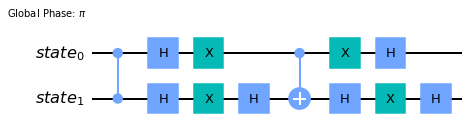

In [59]:
#Demonstarte Grover's Algorithm for w=01

from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover

# the state we desire to find is '01'
good_state = ['01']

# specify the oracle that marks the state '01' as the solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Hidden String:', result.top_measurement)

problem.grover_operator.decompose().draw(output='mpl')